In [149]:
# Machine Learning.
# Linear Regression Forecasting.
# Prediction of the the next month crimes (for assault and battery) on Miami Dade, based on the last 3 months”, 
# this method is usually known as "the forecasting horizon". 
# We have 50 months of Data, where the first month (2015-05) and the last month (2019-6) had been removed 
# because they don’t have the data for whole the month. And the first 3 months of our data was included on the first row of our training matrix, 
# after the cleaning data we only have 45 months. 

# As we are working with labeled Data we will be implementing Supervised Learning Models as: Linear Regression, 
# Supervised vector Regression and Random Forest.

#Import Libraries.

import pandas as pd
# import matplotlib.pylab as plt
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

## Data from
## Battery and assault
df = pd.read_csv('Resources/data3_load_assault_group_to_ML.csv')
df.head()

,Unnamed: 0,Booking_year_month,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,4,2015-09,121,132,13,91,28,22,13,23,...,18,22,32,1,0,0,0,5,43,68
1,5,2015-10,156,142,18,92,32,14,13,29,...,13,10,16,1,0,0,0,5,44,46
2,6,2015-11,114,153,15,112,26,24,17,20,...,18,26,23,0,0,0,1,4,46,75
3,7,2015-12,129,121,11,84,26,13,22,23,...,13,17,8,0,0,0,1,3,42,52
4,8,2016-01,130,156,16,92,48,13,16,21,...,12,15,14,0,0,0,1,7,37,64


In [150]:
# Data Clean
# Drop innecesary columns
df.drop(['Unnamed: 0', 'Booking_year_month'], axis=1, inplace=True)
# df['total_crime']= df['total_crime'].astype(float)

In [151]:

##The variable being predictive is the Dependant variable (y) / (output)
##The variables used to predict the dependent variable are called INDEPENDENT VARIABLES(X) / (input)

X = df.drop('total_crime', axis=1)
y = df['total_crime'].values.reshape(-1, 1)

#reshape of y : Remember that Sklearn is expecting a 2-Dimensional Array in order to properly fit your model.
#X have more than one variable then we DO NOT have to use .reshape().

print(X.shape, y.shape)
#print(X)

# Use sklearn's `train_test_split` to split the data into training and testing
# the split of the data in not aleatory "test_size=10"


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=10)

# • Notice here that you can set the test_size = 0.2. This means that it's an 80/20 split between the Training set and Test set. 
# • make sure you are using 70%-80% of your data as the Training Set and the rest as a Test Set
# • NEVER USE THE DATA FROM THE TEST SET TO FIT THE MODEL 
# sklearn's `train_test_split` by default split the data in random way, giving to us different predictions each time the model runs,
# that is why we  instead of using a random split for train and test we split the data using of the 45 months choosing:
# 35 months for training and 10  for testing.


(45, 54) (45, 1)


In [152]:
df.head()

,total_crime,total_crime_3,age<25_3,age26-50_3,age>50_3,day_of_week_Monday_3,day_of_week_Tuesday_3,day_of_week_Wednesday_3,day_of_week_Thursday_3,day_of_week_Friday_3,...,day_of_week_Friday_1,day_of_week_Saturday_1,day_of_week_Sunday_1,summer_1,spring_1,winter_1,autum_1,CityRN_FOREIGN_1,CityRN_HOMELESS_1,CityRN_MIAMI_1
0,121,132,13,91,28,22,13,23,24,19,...,18,22,32,1,0,0,0,5,43,68
1,156,142,18,92,32,14,13,29,28,23,...,13,10,16,1,0,0,0,5,44,46
2,114,153,15,112,26,24,17,20,20,18,...,18,26,23,0,0,0,1,4,46,75
3,129,121,11,84,26,13,22,23,24,13,...,13,17,8,0,0,0,1,3,42,52
4,130,156,16,92,48,13,16,21,39,18,...,12,15,14,0,0,0,1,7,37,64


In [153]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform the training and testing data using the X_scaler and y_scaler models
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

# We do this step because we will make our algorithm resilient to noise or High variance in the dataset 
# StandardScaler applies a Guassian distribution to our data(NORMAL DISTRIBUTION) 
# where the mean is 0 and the standard deviation is 1. 
# Some algorithms have a difficult time extracting information for a tight group set of points. 
# StandardScaler will spread them out. 

#.fit() part actually generates metdata that you need to perform the Standard Scaling functionality. 
# Means that X_scaler is now a function. • ONLY PERFORM THIS STEP ON THE TRAINING DATA


In [ ]:
## CREATE FIT & PREDICT.

# We will be implementing Supervised Learning Models as: 
# Random Forest, Linear Regression and Supervised vector Regression.

# -	We will get the mae and mse for each model.
# -	Plot on the date_train_range the y_train_predict (blue) vs y_train (green)
# -	Plot on the date_test_range the y_test_predict (red) vs y_test (yellow)
# -	Percentage residual Scatter plot over the time.


## Random Forest (Regression)

In [154]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# We test the Random Forest model with 75, 100, 200, 300, 500 trees, and with the random seed = 1
# the best estimator was 75 trees.

model = RandomForestRegressor(n_estimators=200, random_state=1)

# Fitting our model with all of our features in X:

model.fit(X_train_scaled , y_train_scaled)

# Predicting:

y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# • the model.fit() is what creates the "line" in our model which allows us to get the Bias=y-intercept and Weigtht = slope.
# • X_train and Y_train represent the 2-Dimensional arrays mentioned above.
# model.predict will test the new points in our Linear Regression model. 

# Calculate the MAE and MSE()
randomF_mae = mean_absolute_error(y_prediction, y_test)
randomF_mse = mean_squared_error(y_prediction, y_test)

print("Mean Absolute Error = ", randomF_mae) 
print("Mean Squarred Error= ", randomF_mse) 
# Please note, the MSE do not is affected by the negative difference values. 
# (the Square root of the mse should be approximately to the mae)

# • Mean Square Error: looking to get close to 0
# • it calculates the error = ACTUAL - PREDICTED
# • squares the difference
# • Sums up all those errors and divides by the number of points in the dataset



#r2 = r2_score(y_prediction, y_test)
#print("R2 score = ", r2)


Mean Absolute Error =  10.173499999999999
Mean Squarred Error=  123.97947749999999


C:\Users\cmuiz\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


In [155]:
# The Data has been scaled, we will transform the data to can plot
## The Train data predicted vs the train Data.
## and the test predicted vs the test data

y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [156]:
y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [157]:
len(y_train_predict)

35

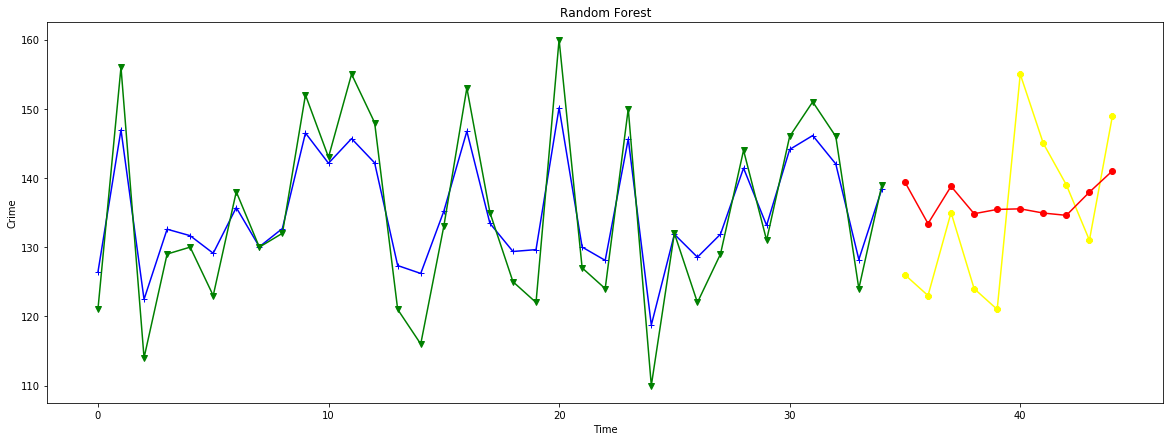

In [158]:
## Lines Plot over the time.
## The Train data predicted vs the train Data.
## and the test predicted vs the test data

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("Random Forest")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("Random_Forest.png")

In [159]:
# The original data has an array format, to can get the differernce we need to :

date_train_range = np.array([i for i in date_train_range])
date_test_range = np.array([i for i in date_test_range])

# the values for ythe Residual plot
train_perc =np.array((y_train.reshape(-1,1) - y_train_predict.reshape(-1,1))*100/y_train.reshape(-1,1))
test_perc =np.array((y_test.reshape(-1,1) - y_test_predict.reshape(-1,1))*100/y_test.reshape(-1,1))
#train_perc

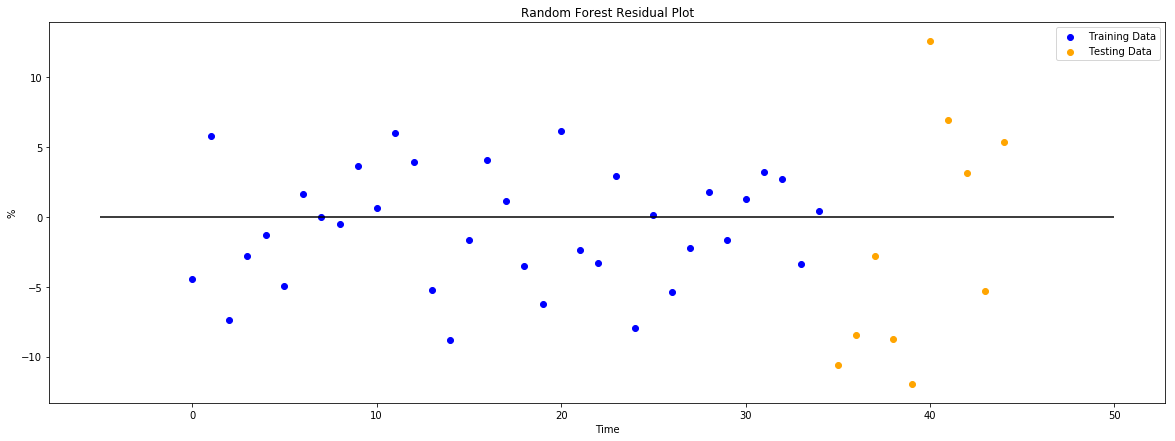

In [160]:
# #Residual Plot
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Random Forest Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("Random_Forest_Residual_Plot.png")


# • it's a way to visualize the assumptions made from the model
# • This is a way to visualize the difference between the Independent Variables on x-axis and the and the RESIDUALS on the y-axis (ACTUAL - PREDICTED)
# • Checking the variability of our model  to see if it's consistent throughout
# • Be aware that this comparison is done on both the Training and Test set.  The training data in this case is Blue and the Testing Data is Orange


## Linear Regression Model

In [161]:
## Linear Regression


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()

# Fitting our model with all of our features in X:

model.fit(X_train_scaled , y_train_scaled)

# Predicting:

y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
linear_reg_mae = mean_absolute_error(y_prediction, y_test)
linear_reg_mse = mean_squared_error(y_prediction, y_test)

print("Mean Absolute Error = ", linear_reg_mae) 
print("Mean Squarred Error= ", linear_reg_mse) 
# Please note, the MSE do not is affected by the negative difference values. 
# (the Square root of the mse should be approximately to the mae)

#r2 = r2_score(y_prediction, y_test)
#print("R2 score = ", r2)

Mean Absolute Error =  24.705689904663686
Mean Squarred Error=  1113.5149237601868


In [162]:
# The Dtaa has been scaled, we will transform the dat
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

In [163]:
len(y_train_predict)

35

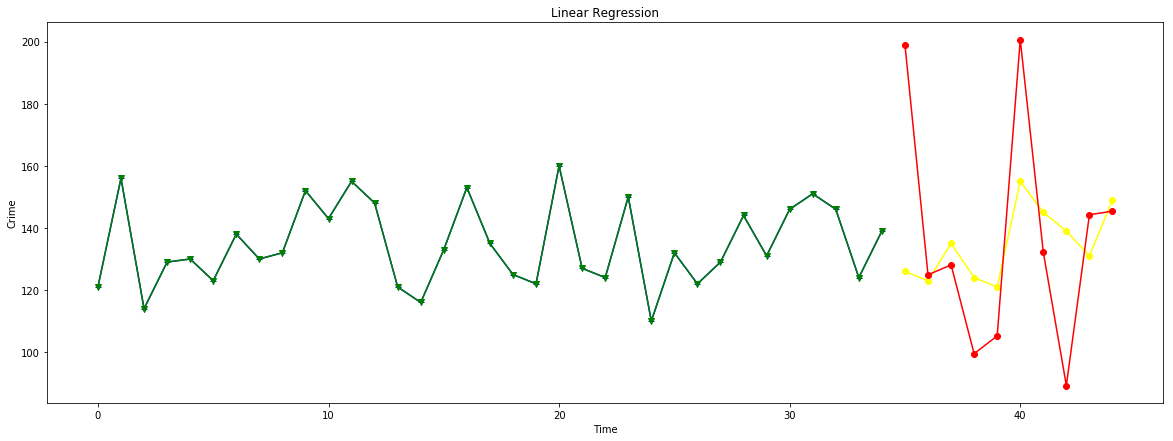

In [164]:
## Plot The Train data predicted vs the train Data.
## and the test prodict vs the test

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("Linear Regression")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("Linear_Regression.png")

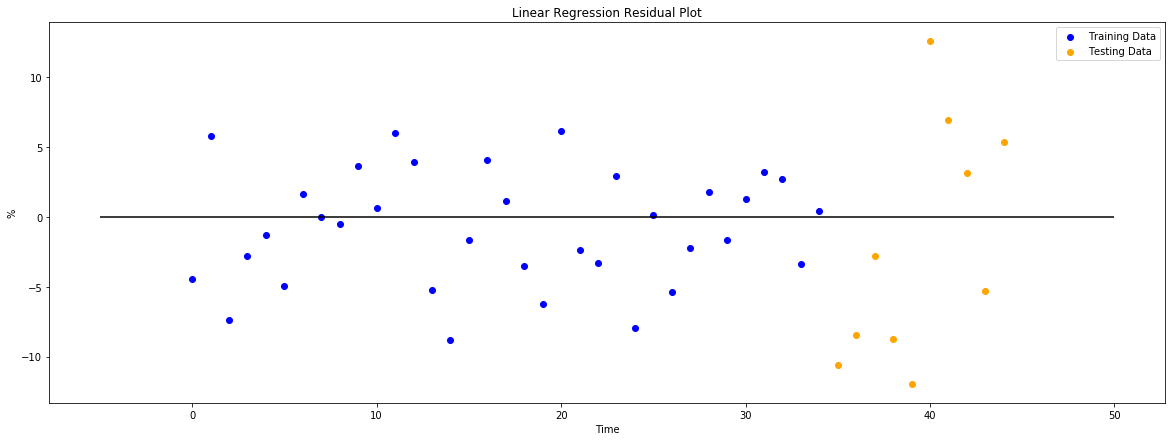

In [165]:
# #Residual Plot
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("Linear Regression Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("Linear_Regression_Residual_Plot.png")

## SVR

In [166]:
from sklearn import svm
from sklearn.svm import SVR

In [167]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


#model = svm.SVR(gamma='scale', C=1.0, epsilon=0.2)
model = svm.SVR(gamma='scale', C=1.0, epsilon=0.2)
# Fitting our model with all of our features in X

model.fit(X_train_scaled , y_train_scaled)
y_prediction = model.predict(X_test_scaled)
y_prediction = y_scaler.inverse_transform(y_prediction)

# Calculate the MAE and MSE()
svr_mae = mean_absolute_error(y_prediction, y_test)
svr_mse = mean_squared_error(y_prediction, y_test)


print("SVR Mean Absolute Error = ", svr_mae) 
print("SVR Mean Squarred Error= ", svr_mse) 

SVR Mean Absolute Error =  9.875907998006161
SVR Mean Squarred Error=  119.86657181969954


C:\Users\cmuiz\Anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [168]:
y_train_predict=model.predict(X_train_scaled)
y_train_predict=y_scaler.inverse_transform(y_train_predict)

In [169]:
y_test_predict=model.predict(X_test_scaled)
y_test_predict=y_scaler.inverse_transform(y_test_predict)

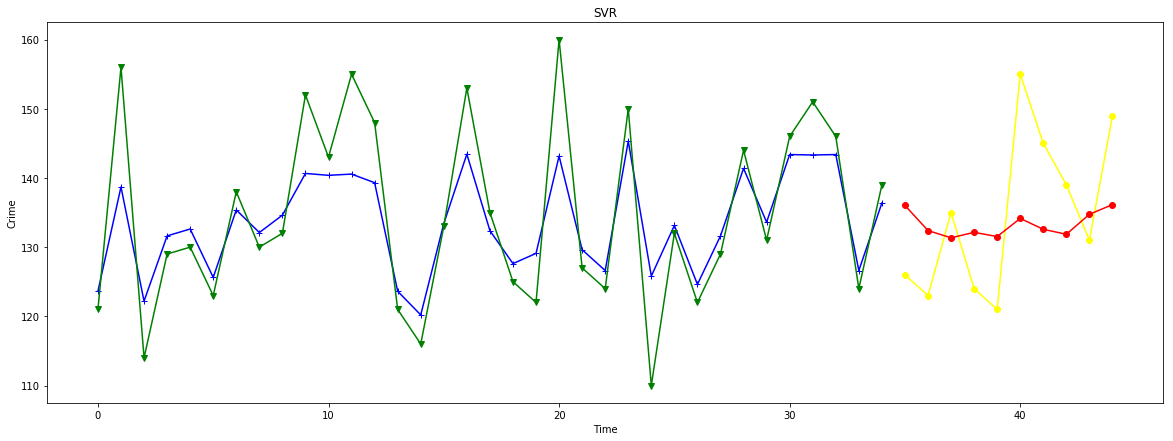

In [170]:
## Plot The Train data predicted vs the train Data.
## and the test prodict vs the test

plt.figure(figsize=(20,7))
date_train_range = range(len(y_train_predict))
plt.plot(date_train_range , y_train_predict, marker='+', color='blue')
plt.plot(date_train_range , y_train, marker='v', color='green')
date_test_range = range(len(y_train_predict),len(y))
plt.plot(date_test_range, y_test, marker='8', color='yellow')
plt.plot(date_test_range, y_test_predict, marker='o', color='red')
plt.title("SVR")
plt.xlabel("Time")
plt.ylabel("Crime")
plt.savefig("SVR.png")

In [171]:
# The original data has an array format, to can get the differernce we need to :

date_train_range = np.array([i for i in date_train_range])
date_test_range = np.array([i for i in date_test_range])

# the values for ythe Residual plot
train_perc =np.array((y_train.reshape(-1,1) - y_train_predict.reshape(-1,1))*100/y_train.reshape(-1,1))
test_perc =np.array((y_test.reshape(-1,1) - y_test_predict.reshape(-1,1))*100/y_test.reshape(-1,1))


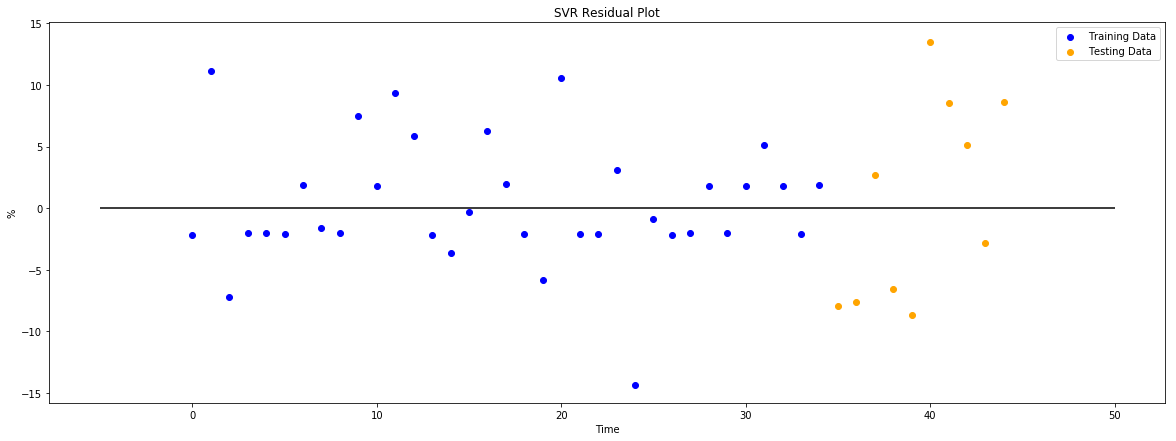

In [172]:
# #Residual Plot SVR
plt.figure(figsize=(20,7))
plt.scatter(date_train_range, train_perc, c="blue", label="Training Data")
plt.scatter(date_test_range, test_perc, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=-5, xmax=50)
plt.title("SVR Residual Plot")
plt.xlabel("Time")
plt.ylabel("%")
plt.savefig("SVR_Residual_Plot.png")

In [173]:
print("Random Forest mae and mse:")
print("")
print("Mean Absolute Error= ", randomF_mae) 
print("Mean Squarred Error= ", randomF_mse)
print("")
print("#----------------------------------------#")
print("Linear Regression mae and mse:")
print("")
print("Mean Absolute Error = ", linear_reg_mae) 
print("Mean Squarred Error= ", linear_reg_mse)
print("")
print("#----------------------------------------#")
print("SVR mae and mse:")
print("")
print("Mean Absolute Error = ", svr_mae) 
print("Mean Squarred Error= ", svr_mse) 
print("")
print("#----------------------------------------#")

Random Forest mae and mse:

Mean Absolute Error=  10.173499999999999
Mean Squarred Error=  123.97947749999999

#----------------------------------------#
Linear Regression mae and mse:

Mean Absolute Error =  24.705689904663686
Mean Squarred Error=  1113.5149237601868

#----------------------------------------#
SVR mae and mse:

Mean Absolute Error =  9.875907998006161
Mean Squarred Error=  119.86657181969954

#----------------------------------------#


In [ ]:
# Conclusion:

# The best mae and mse between the models belongs to the support vector regression. 
# As our data it is not big enough, we used simples models, as basic models fits well with small data, 
# the prediction it not as accurate as we expect that why we will recommend to collect more years and 
# features to do a better forecasting.